# Question 2

In [1]:
import sqlite3
import pandas as pd

## 1. Min Amino Acid Entry

In [2]:
prokaryote_name = 'GCF_000005845_2'
con = sqlite3.connect('data/prokaryotes.db')
cur = con.cursor()
res = cur.execute("select translation, length(translation) from "
                  +prokaryote_name+
                  " where length(translation) = (SELECT min(length(translation)) from "
                  +prokaryote_name+
                  ");")
print(res.fetchall())
con.close()

[('MKNSVAEH', 8), ('MIKSDQET', 8)]


## 2. Max Amino Acid Entry

In [3]:
con = sqlite3.connect('data/prokaryotes.db')
cur = con.cursor()
res = cur.execute("select translation, length(translation) from "
                  +prokaryote_name+
                  " where length(translation) = (SELECT max(length(translation)) from "
                  +prokaryote_name+
                  ");")
print(res.fetchall())
con.close()

[('MATKKRSGEEINDRQILCGMGIKLRRLTAGICLITQLAFPMAAAAQGVVNAATQQPVPAQIAIANANTVPYTLGALESAQSVAERFGISVAELRKLNQFRTFARGFDNVRQGDELDVPAQVSEKKLTPPPGNSSDNLEQQIASTSQQIGSLLAEDMNSEQAANMARGWASSQASGAMTDWLSRFGTARITLGVDEDFSLKNSQFDFLHPWYETPDNLFFSQHTLHRTDERTQINNGLGWRHFTPTWMSGINFFFDHDLSRYHSRAGIGAEYWRDYLKLSSNGYLRLTNWRSAPELDNDYEARPANGWDVRAESWLPAWPHLGGKLVYEQYYGDEVALFDKDDRQSNPHAITAGLNYTPFPLMTFSAEQRQGKQGENDTRFAVDFTWQPGSAMQKQLDPNEVAARRSLAGSRYDLVDRNNNIVLEYRKKELVRLTLTDPVTGKSGEVKSLVSSLQTKYALKGYNVEATALEAAGGKVVTTGKDILVTLPAYRFTSTPETDNTWPIEVTAEDVKGNLSNREQSMVVVQAPTLSQKDSSVSLSTQTLNADSHSTATLTFIAHDAAGNPVVGLVLSTRHEGVQDITLSDWKDNGDGSYTQILTTGAMSGTLTLMPQLNGVDAAKAPAVVNIISVSSSRTHSSIKIDKDRYLSGNPIEVTVELRDENDKPVKEQKQQLNNAVSIDNVKPGVTTDWKETADGVYKATYTAYTKGSGLTAKLLMQNWNEDLHTAGFIIDANPQSAKIATLSASNNGVLANENAANTVSVNVADEGSNPINDHTVTFAVLSGSATSFNNQNTAKTDVNGLATFDLKSSKQEDNTVEVTLENGVKQTLIVSFVGDSSTAQVDLQKSKNEVVADGNDSVTMTATVRDAKGNLLNDVMVTFNVNSAEAKLSQTEVNSHDGIATATLTSLKNGDYRVTASVSSGSQANQQVNFIGDQSTAALTLSVPSGDITVTNTAPQYMTATLQDKNGNPLKDKEITFSVPNDVASKFSISNGGKGM

## 3. The length distribution of "Gene Group(D<100)" of GCF_000005845_2 was compared with GCF_000008865_2

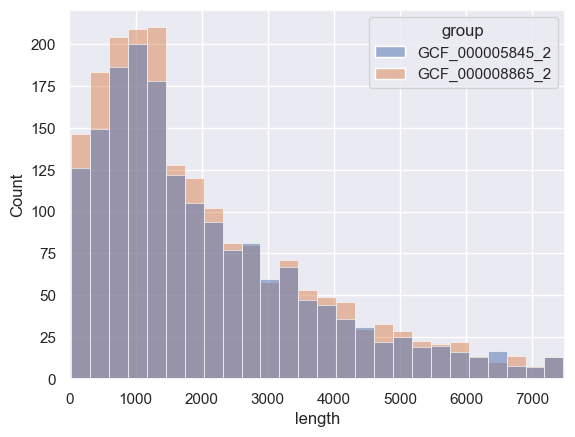

In [4]:
import DataManager
import matplotlib.pyplot as plt
import seaborn as sns


source = "GCF_000005845_2"
target = "GCF_000008865_2"
db_name = 'prokaryotes.db'
source_operons = DataManager.find_candidate_operon(db_name,source)
target_operons = DataManager.find_candidate_operon(db_name,target)
source_operons_length = DataManager.build_distribution_dataframe(source, source_operons)
target_operons_length = DataManager.build_distribution_dataframe(target, target_operons)

data = pd.concat([source_operons_length, target_operons_length], ignore_index=True)

plt.figure()
sns.set_theme()
# sns.histplot(data=ecoil_df, x='length', hue='group', bins=50, stat='density', common_norm=False)
sns.histplot(data=data, x='length', hue='group')
plt.xlim(0, 7500)
plt.show()
plt.close()
del data

## 4. Printing Table

In [5]:
import DataManager
import os

table = "GCF_000005845_2"
db_name = 'prokaryotes.db'
datas = DataManager.read_cds_data(db_name, table)
path = os.getcwd() + "/out/"
if not os.path.exists(path):
    os.mkdir(path)
with open(path + table, 'w') as f:
    f.write('#entry\tdefinition\taaseq\tntseq'+'\n')
    for row in datas:
        f.write('\t'.join(map(str, row)) + '\n')
print(path + table)

/Users/mac-studio/Desktop/bioinfomatics/out/GCF_000005845_2
